## importing module and package

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# vizualisation
import seaborn as sns
import matplotlib.pyplot as plt

# prepocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder

# model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# resampling
from imblearn.over_sampling import SMOTE

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

## Data preparation

In [2]:
# load the dataset
df = pd.read_csv('data/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.duplicated().sum() # duplicate rows check

0

In [4]:
df.info() # check on variable type and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
# let's take a look at features (categorical or numeric)
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

**The target feature** is `churn` and we can see that churn has 2 distinct values (False and True). So we can say that we are goingto work on a **classification problem**. 

In [6]:
# Let's drop phone number this is a irrelevant feature
df.drop(['phone number'],axis=1,inplace=True)
df.shape

(3333, 20)

In [7]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
# split categoricals and numerics columns
num_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
            'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
            'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']

cat_cols = ['state','area code','international plan','voice mail plan']

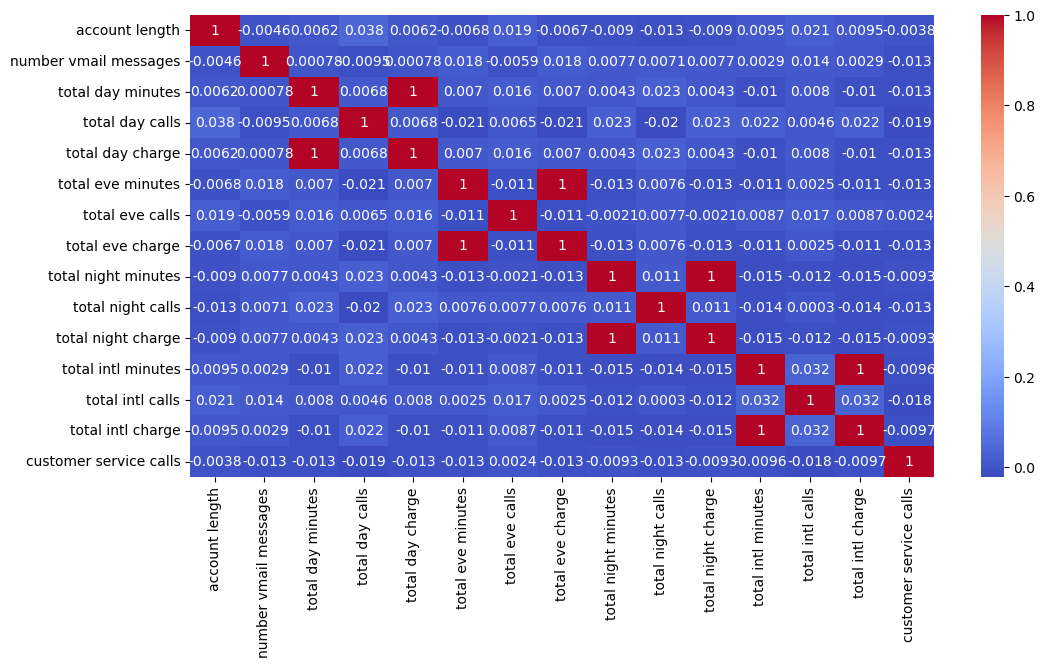

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.show()

we can see some features have a perfect correlation for example (`total day charge` and `total day minutes`). it happens because of one depend on the others, then it's not necessary to use both.

In [10]:
# let's drop them 

df= df.drop(columns=[
    "total day charge",
    "total eve charge",
    "total night charge",
    "total intl charge"
])

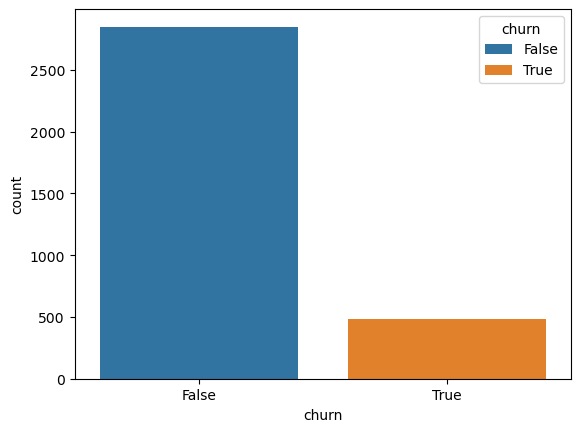

In [11]:
# let's show the proportion of each value
sns.countplot(x='churn', hue='churn', data=df)
plt.show()

In [12]:
print(df["churn"].value_counts(normalize=True))

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64


Our target variable(`churn`) is imbalanced, which means that one class has significantly more observations than the other. For example, if 85.5% of the data belongs to **class 0** and only 14.5% belongs to **class 1**, the model may become biased and mainly predict the majority class. This can lead to misleading accuracy and poor performance in detecting the minority class, which is often the most important one in practice.

To address this issue, we need to **resample** the dataset. This can be done either by oversampling the minority class (using SMOTE) or by undersampling the majority class. The goal is to create a more balanced distribution of classes so that the model learns to recognize both classes effectively and achieves **better generalization**.

## Data preprocessing

In [13]:
# Encoding the target
label_encoder = LabelEncoder()
df["churn"] = label_encoder.fit_transform(df["churn"])

In [14]:
# encoding categorical features to numeric
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)

In [15]:
df_encoded.head()

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_yes,voice mail plan_yes
0,128,25,265.1,110,197.4,99,244.7,91,10.0,3,...,0,0,0,0,0,0,1,0,0,1
1,107,26,161.6,123,195.5,103,254.4,103,13.7,3,...,0,0,0,0,0,0,1,0,0,1
2,137,0,243.4,114,121.2,110,162.6,104,12.2,5,...,0,0,0,0,0,0,1,0,0,0
3,84,0,299.4,71,61.9,88,196.9,89,6.6,7,...,0,0,0,0,0,0,0,0,1,0
4,75,0,166.7,113,148.3,122,186.9,121,10.1,3,...,0,0,0,0,0,0,1,0,1,0


## Modeling

In [16]:
y = df_encoded['churn']
X = df_encoded.drop('churn', axis=1)

In [18]:
# split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42, stratify=y)

In [19]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE :", y_train.value_counts())
print("After SMOTE :", y_train_res.value_counts())

Before SMOTE : churn
0    1995
1     338
Name: count, dtype: int64
After SMOTE : churn
0    1995
1    1995
Name: count, dtype: int64


In [20]:
# standardize 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Create and train the models

# initialize the models 
lr = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42) # Logistic Regression model
rf = RandomForestClassifier(class_weight="balanced", n_estimators=100, random_state=42) # Random forest model
dt = DecisionTreeClassifier(class_weight="balanced", random_state=42)

# train resamplimg models
lr.fit(X_train_res, y_train_res)
rf.fit(X_train_res, y_train_res)
dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [37]:
# prediction for logistic Regression
y_pred_lr_train = lr.predict(X_train_scaled)
y_pred_lr_test = lr.predict(X_test_scaled)

In [38]:
# evaluation
print(f"Train accuracy: {accuracy_score(y_train,y_pred_lr_train)}")
print(f"Test accuracy: {accuracy_score(y_test,y_pred_lr_test)}")
print(classification_report(y_test, y_pred_lr_test))

Train accuracy: 0.6300900128589798
Test accuracy: 0.575
              precision    recall  f1-score   support

           0       0.89      0.57      0.70       855
           1       0.19      0.60      0.29       145

    accuracy                           0.57      1000
   macro avg       0.54      0.59      0.49      1000
weighted avg       0.79      0.57      0.64      1000



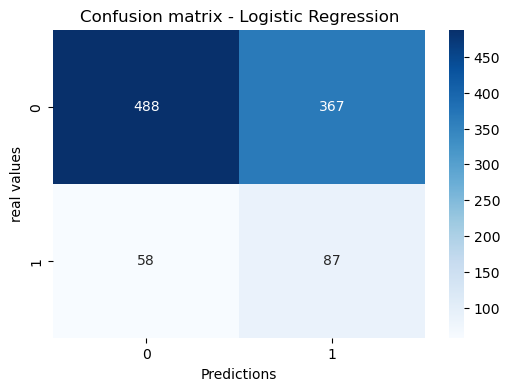

In [39]:
# confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr_test)

plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.xlabel("Predictions")
plt.ylabel("real values")
plt.title("Confusion matrix - Logistic Regression")
plt.show()

In [40]:
# prediction for random forest
y_pred_rf_train = rf.predict(X_train_scaled)
y_pred_rf_test = rf.predict(X_test_scaled)

In [41]:
# evaluation
print(f"Train accuracy: {accuracy_score(y_train,y_pred_rf_train)}")
print(f"Test accuracy: {accuracy_score(y_test,y_pred_rf_test)}")
print(classification_report(y_test, y_pred_rf_test))

Train accuracy: 0.8546935276468067
Test accuracy: 0.859
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       855
           1       0.75      0.04      0.08       145

    accuracy                           0.86      1000
   macro avg       0.80      0.52      0.50      1000
weighted avg       0.84      0.86      0.80      1000



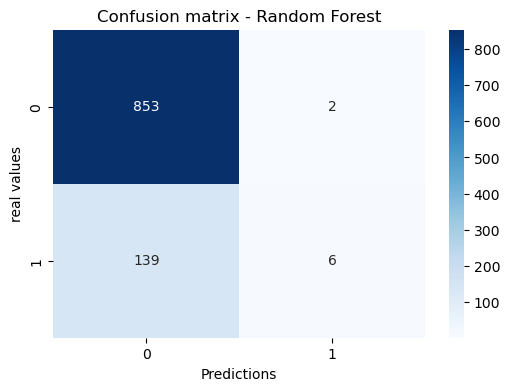

In [49]:
# confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf_test)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel("Predictions")
plt.ylabel("real values")
plt.title("Confusion matrix - Random Forest")
plt.show()

In [50]:
# prediction for decision trees
y_pred_dt_train = dt.predict(X_train_scaled)
y_pred_dt_test = dt.predict(X_test_scaled)

In [51]:
# evaluation
print(f"Train accuracy: {accuracy_score(y_train,y_pred_dt_train)}")
print(f"Test accuracy: {accuracy_score(y_test,y_pred_dt_test)}")
print(classification_report(y_test, y_pred_dt_test))

Train accuracy: 0.4967852550364338
Test accuracy: 0.489
              precision    recall  f1-score   support

           0       0.88      0.47      0.61       855
           1       0.16      0.61      0.26       145

    accuracy                           0.49      1000
   macro avg       0.52      0.54      0.43      1000
weighted avg       0.77      0.49      0.56      1000



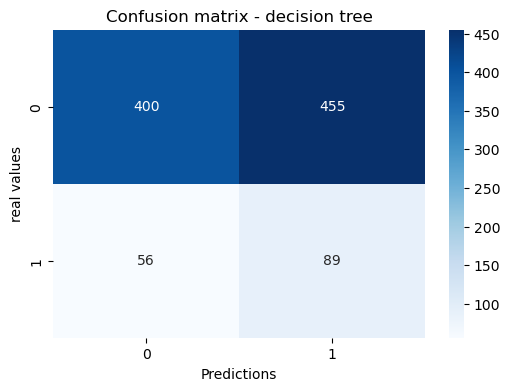

In [53]:
# confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt_test)

plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.xlabel("Predictions")
plt.ylabel("real values")
plt.title("Confusion matrix - decision tree")
plt.show()

In [55]:
# calcul the probabilities and AUC
y_probs_lr = lr.predict_proba(X_test)[:,1]
y_probs_rf = rf.predict_proba(X_test)[:,1]
y_probs_dt = dt.predict_proba(X_test)[:,1]

# AUC
auc_lr = roc_auc_score(y_test, y_probs_lr)
auc_rf = roc_auc_score(y_test, y_probs_rf)
auc_dt = roc_auc_score(y_test, y_probs_dt)

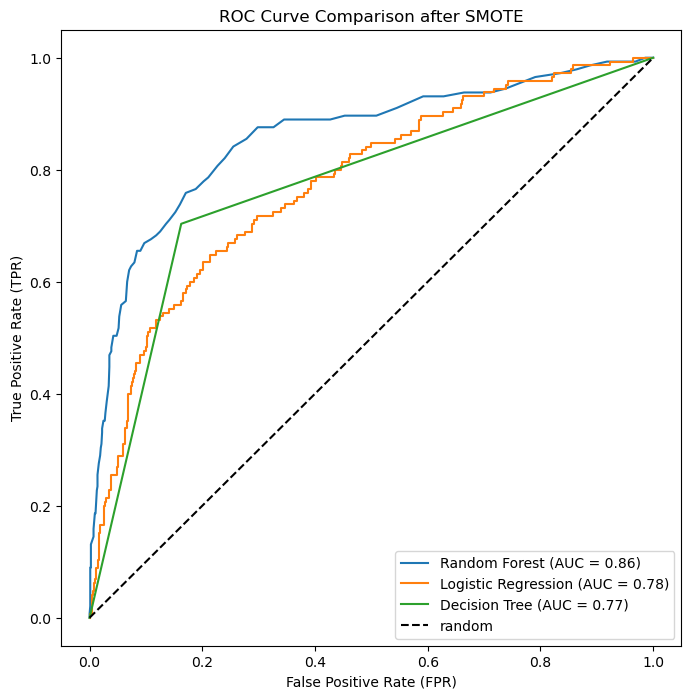

In [56]:
# draw the ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)

plt.figure(figsize=(8,8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0,1], [0,1], 'k--', label='random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison after SMOTE')
plt.legend()
plt.show()